credits: https://youtube.com/playlist?list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [31]:
DATA_DIR = os.getcwd() + f'/kagglecatsanddogs_3367a/PetImages/'
CATEGORIES = ['Dog', 'Cat']

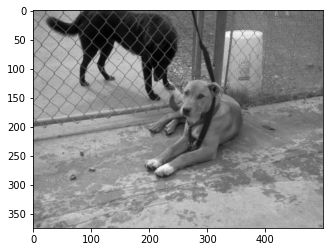

In [32]:
for category in CATEGORIES:
    path = os.path.join(DATA_DIR+category)
    
    for image in os.listdir(path):
        img_data = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_data, cmap='gray')
        plt.show()
        
        break
    break

In [33]:
img_data.shape

(375, 500)

In [34]:
img_array = cv2.resize(img_data, (50,50))
img_array.shape

(50, 50)

In [35]:
import random 

training_data = []

for category in CATEGORIES:
    path = os.path.join(DATA_DIR+category)
    class_label = CATEGORIES.index(category)
    
    i = 0
    rnd = random.randint(1000, 2000)
    
    for image in os.listdir(path):
        
        if i == rnd:
            break
        try:
            img_data = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
            img_resize = cv2.resize(img_data, (50,50))

            training_data.append([img_resize, class_label])
            i += 1
            
        except Exception as e:
            pass

In [36]:
random.shuffle(training_data)

In [37]:
X = []
y = []

for features, label in training_data:
    
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, 50, 50, 1)
y = np.array(y)

In [38]:
import collections
print(collections.Counter(list(y)))

Counter({1: 1463, 0: 1294})


In [40]:
import pickle

pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()